In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['DOB_Permit_Issuance.csv']


In [30]:
data = pd.read_csv('../input/DOB_Permit_Issuance.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,8,9,10,15,25,31,33,34,35,36,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
data = data.head(1000000)

In [33]:
# data

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

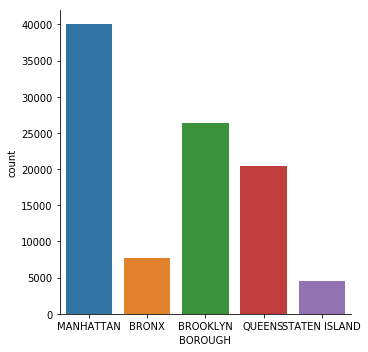

In [15]:
#describing BOROUGH(city) according to  count
sns.catplot('BOROUGH', data = data, kind ='count')

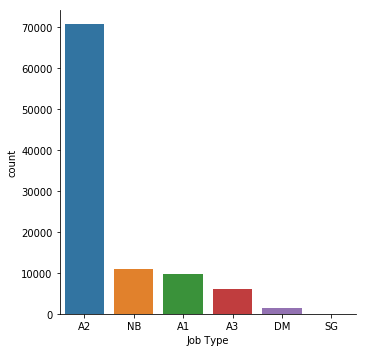

In [16]:
#describing Jobtype according to  count A-alternation(change)
sns.catplot('Job Type', data = data, kind ='count')

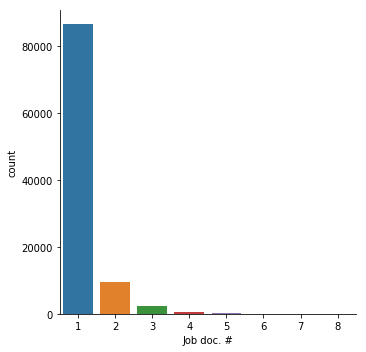

In [17]:
#describing Jobtype according to  count
sns.catplot('Job doc. #', data = data, kind ='count')

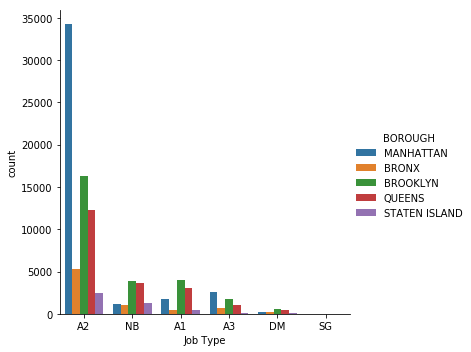

In [18]:
#describing Jobtype according to  count
#shows that maximum aplication comes for the second type of alternation, and from these From MANHATTAN maximun applicaton is for A2 (2nd alternation) 

sns.catplot('Job Type', data = data, hue= 'BOROUGH', kind ='count')

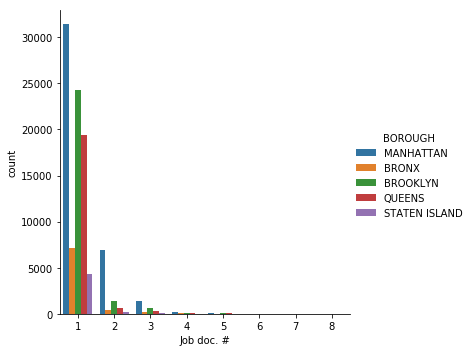

In [19]:
sns.catplot('Job doc. #', data = data, hue= 'BOROUGH', kind ='count')

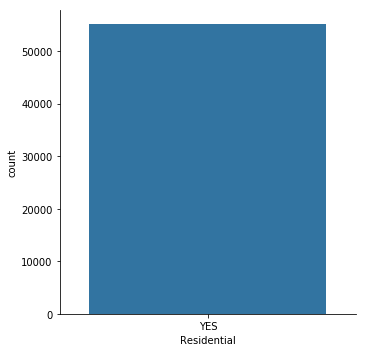

In [20]:
sns.catplot('Residential', data = data, kind ='count')
#shows that out of 15k data only 8k people live at rest have just received the permit and dint leave 

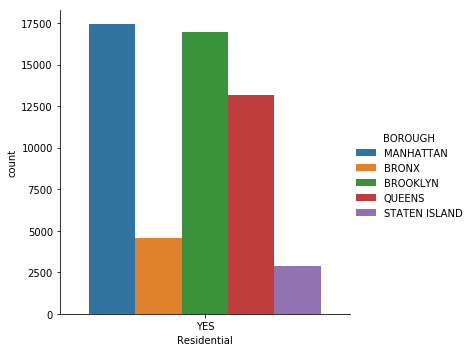

In [22]:
sns.catplot('Residential', data = data,hue = 'BOROUGH', kind ='count')
#shows that out of 15k data only 8k people live at rest have just received the permit and dint leave 

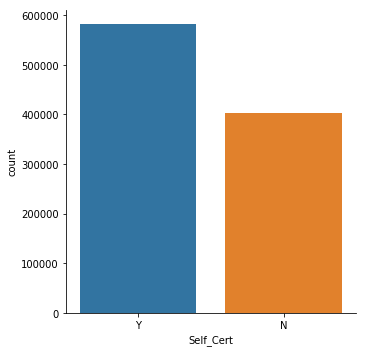

In [45]:
sns.catplot('Self_Cert', data = data, kind ='count')

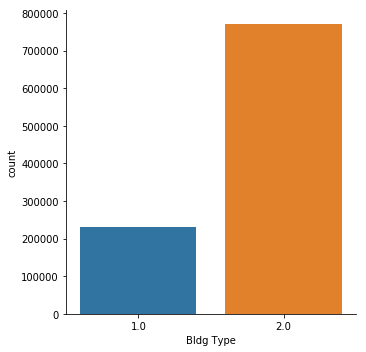

In [46]:
sns.catplot('Bldg Type', data = data, kind ='count')

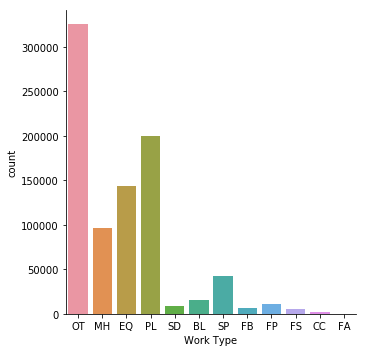

In [47]:
sns.catplot('Work Type', data = data, kind ='count')
#DOB Designated Work Types (PL-Plumbing, BL-Boiler, MH-Mechanical, OT-Other Constuction Equipment, etc.)

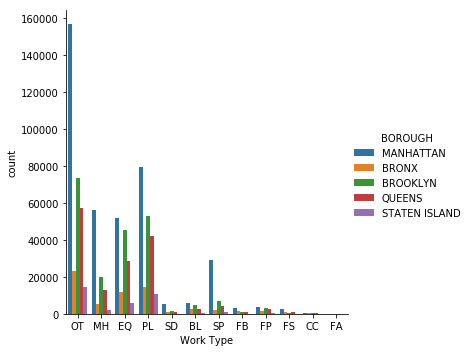

In [48]:
sns.catplot('Work Type', data = data, hue= 'BOROUGH', kind ='count')

In [23]:
#What percentage of borough permits are for residential projects?
boroughs = ['BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'BRONX'] #list of borough names to pass to for loop

for i in boroughs:
    """
    this for loop returns the percentage of residential permits
    within each borough

    count the number of residential permits then divide by the
    total number of borough permits
    """
    print( '\n' + i)
    print (data[data['BOROUGH'] == i]['Residential'].value_counts() / len(data[data['BOROUGH'] == i]))


BROOKLYN
YES    0.643082
Name: Residential, dtype: float64

MANHATTAN
YES    0.435323
Name: Residential, dtype: float64

QUEENS
YES    0.644088
Name: Residential, dtype: float64

STATEN ISLAND
YES    0.643744
Name: Residential, dtype: float64

BRONX
YES    0.596722
Name: Residential, dtype: float64


Looks like Manhattan is the only borough to issue more permits for commercial projects than residential!

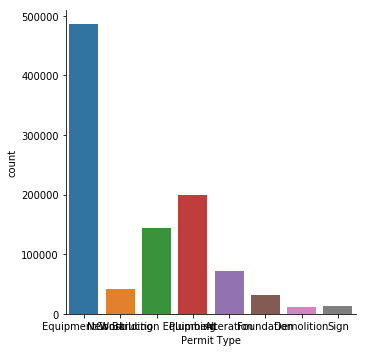

In [34]:
data['Permit Type'] = data['Permit Type'].map({'EW': 'Equipment Work', 'PL': 'Plumbing',
                                            'EQ': 'Construction Equipment', 'AL': 'Alteration',
                                            'NB': 'New Building', 'FO': 'Foundation',
                                            'SG': 'Sign', 'DM': 'Demolition'}) #use map function to set new values
sns.catplot('Permit Type', data = data, kind ='count')


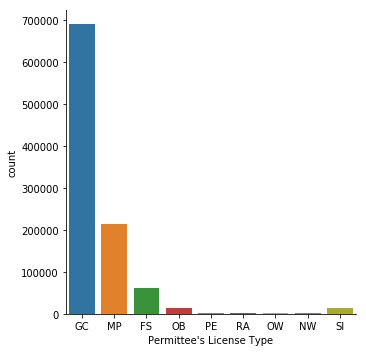

In [49]:
sns.catplot("Permittee's License Type", data = data, kind ='count')

In [26]:
# How many permits have been issued by zip code?
data['Zip Code'].value_counts().sort_index(ascending=False).head(5)  #counting the # of permits by zipcode then sorting them

11697.0    264
11694.0    297
11693.0    308
11692.0    363
11691.0    471
Name: Zip Code, dtype: int64

It is helpful to know the 5 zip codes with the most permits issues but it doesn’t tell me where they are in the city. Let’s map the data to get an idea of where these are located, through visual inspection

In [43]:
data1 = data[data['Permit Status'] == 'ISSUED']
# data1

In [41]:
data1['Issuance Date'] = pd.to_datetime(data1['Issuance Date'], format='%d%b%Y:%H:%M:%S.%f') #format date to perform datetime functions

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
# data1['Issuance Date'].dt.year.value_counts() #counting values by year using datetime function

In [42]:
# data
# sns.catplot('Residential', data = data1,hue = 'Issuance Date', kind ='count')